# Hossein Baghdadi

# KNN & SVM Project with scikit-learn

# Section 2 

# Tools

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
mean1 = np.array([2.5, 0.25])
cov1 = np.array([[1, 0.75], [0.75, 1]])

mean2 = np.array([-1.5, 0])
cov2 = np.array([[2, 0.5], [0.5, 2]])

In [3]:
print('Mean for Class1 is :', mean1)
print('Cov for Class1 is :\n', cov1)

Mean for Class1 is : [2.5  0.25]
Cov for Class1 is :
 [[1.   0.75]
 [0.75 1.  ]]


In [4]:
print('Mean for Class2 is :', mean2)
print('Cov for Class2 is :\n', cov2)

Mean for Class2 is : [-1.5  0. ]
Cov for Class2 is :
 [[2.  0.5]
 [0.5 2. ]]


# Random Sample 100 & 100

# Class1

In [5]:
np.random.seed(0)
class1 = np.random.multivariate_normal(mean1, cov1, size=100)
class1[0:5]

array([[ 0.70840319, -1.25864293],
       [ 0.79219906,  0.12674984],
       [ 1.09857937, -1.84246045],
       [ 1.66478652, -0.69223919],
       [ 2.4513839 ,  0.49172089]])

In [6]:
print(type(class1))
print(class1.shape)
print(class1.dtype)

<class 'numpy.ndarray'>
(100, 2)
float64


# Visualize the data of Class1

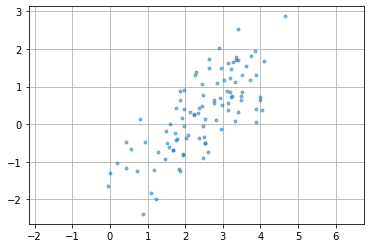

In [7]:
plt.plot(class1[:, 0], class1[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

# Class2

In [8]:
np.random.seed(0)
class2 = np.random.multivariate_normal(mean2, cov2, size=100)
class2[0:5]

array([[-3.81881679, -1.62572417],
       [-4.53493277,  0.84640811],
       [-2.74164584, -2.93434078],
       [-2.43115196, -1.19331033],
       [-1.74018655,  0.47099092]])

In [9]:
print(type(class2))
print(class2.shape)
print(class2.dtype)

<class 'numpy.ndarray'>
(100, 2)
float64


# Visualize the data of Class2

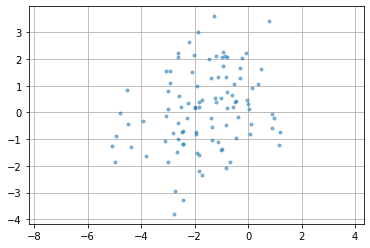

In [10]:
plt.plot(class2[:, 0], class2[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

# Visualize the data of Classes

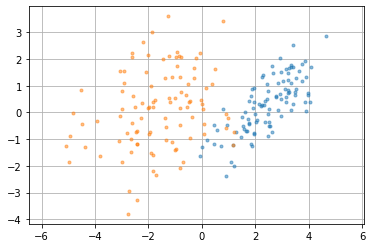

In [11]:
plt.plot(class1[:, 0], class1[:, 1], '.', alpha=0.5)
plt.plot(class2[:, 0], class2[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

# DataFrame for Class1

In [12]:
df1 = pd.DataFrame(data=class1, columns=['Feature1', 'Feature2'])
df1.head()

,Feature1,Feature2
0,0.708403,-1.258643
1,0.792199,0.126750
2,1.098579,-1.842460
3,1.664787,-0.692239
4,2.451384,0.491721


In [13]:
df1['Target'] = 0

# DataFrame for Class2

In [14]:
df2 = pd.DataFrame(data=class2, columns=['Feature1', 'Feature2'])
df2.head()

,Feature1,Feature2
0,-3.818817,-1.625724
1,-4.534933,0.846408
2,-2.741646,-2.934341
3,-2.431152,-1.193310
4,-1.740187,0.470991


In [15]:
df2['Target'] = 1

# Our Final Dataset

In [16]:
df = pd.concat([df1, df2])
df.head()

,Feature1,Feature2,Target
0,0.708403,-1.258643,0
1,0.792199,0.126750,0
2,1.098579,-1.842460,0
3,1.664787,-0.692239,0
4,2.451384,0.491721,0


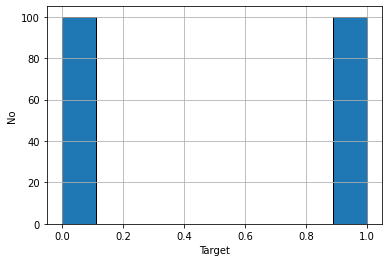

In [17]:
plt.hist(df['Target'], bins='auto', edgecolor='black')
plt.xlabel('Target')
plt.ylabel('No')
plt.grid()
plt.show()

# Feature Set

In [18]:
df.columns

Index(['Feature1', 'Feature2', 'Target'], dtype='object')

In [19]:
X = df[['Feature1', 'Feature2']].values
X[0:5]

array([[ 0.70840319, -1.25864293],
       [ 0.79219906,  0.12674984],
       [ 1.09857937, -1.84246045],
       [ 1.66478652, -0.69223919],
       [ 2.4513839 ,  0.49172089]])

In [20]:
y = df['Target'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

# Preprocessing

In [21]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

array([[ 0.12360583, -1.16300414],
       [ 0.15877796, -0.06819729],
       [ 0.28737675, -1.62436602],
       [ 0.52503417, -0.7154035 ],
       [ 0.85519727,  0.22022114]])

# Train & Test Set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (160, 2) (160,)
Test set: (40, 2) (40,)


# KNN Classifier

# Accuracy

In [23]:
Ks = 10
mean_acc = np.zeros(Ks-1)
std_acc = np.zeros(Ks-1)

for i in range(1, Ks):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    ypred = model.predict(X_test)
    mean_acc[i-1] = accuracy_score(y_test, ypred) * 100
    
    std_acc[i-1] = np.std(ypred==y_test)/np.sqrt(ypred.shape[0])

mean_acc

array([ 97.5,  97.5,  97.5, 100. ,  97.5, 100. , 100. , 100. , 100. ])

In [24]:
print('The best accuracy is :', mean_acc.max(), 'with k :', mean_acc.argmax()+1)

The best accuracy is : 100.0 with k : 4


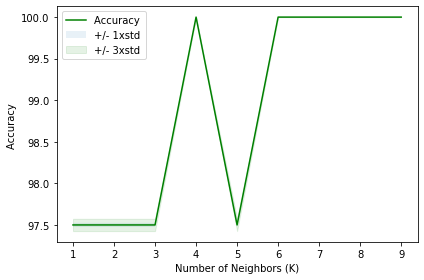

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Confusion Matrix

In [26]:
c = confusion_matrix(y_test, ypred)
c

array([[23,  0],
       [ 0, 17]], dtype=int64)

# Classification Report

# F1-score

In [27]:
rp = classification_report(y_test, ypred)
print(rp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# SVM Classifier

In [28]:
clf = svm.SVC(kernel='rbf')         # Radial basis function 
clf = clf.fit(X_train, y_train)
clf

SVC()

In [29]:
yhat = clf.predict(X_test)
print(yhat[0:5])
print(y_test[0:5])

[0 0 0 1 1]
[0 0 0 1 1]


# Accuracy

In [30]:
print('Train Set Accuracy is :', accuracy_score(y_train, clf.predict(X_train)) * 100)
print('Test Set Accuracy is :', accuracy_score(y_test, yhat) * 100)

Train Set Accuracy is : 94.375
Test Set Accuracy is : 100.0


# Confusion Matrix

In [31]:
confusion_matrix(y_test, yhat, labels=[0, 1])

array([[23,  0],
       [ 0, 17]], dtype=int64)

# Classification Report

# F1-score

In [32]:
rp = classification_report(y_test, ypred)
print(rp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

